<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_5626/614783724.py:66: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


1600
[0.000e+00 1.000e+00 2.000e+00 ... 1.597e+03 1.598e+03 1.599e+03]
1.4492317400000072
1600


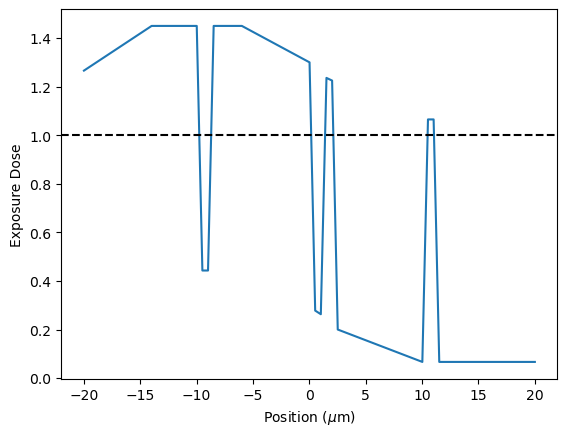

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from scipy.signal import convolve2d

min_pix_size = 25 #Adress size
width = 40000 #nanometers
pix_width = width/min_pix_size
pix_width = int(pix_width)
print(pix_width)


RT = 1 # Resist Threshold 
pixels = np.linspace(0,pix_width-1,pix_width)

micro_meter = pixels *25/1000
D = np.zeros(pix_width) #Dose
print(pixels)
D[0] = 1.266


# Defining uncorrected dose profile

for i in range(pix_width):
    if i < 240:
        D[i+1] = D[i]+ 0.00076666
    if 239 < i < 400:
        D[i+1] = D[i]
    if 399 < i < 420:
        D[i+1] = D[i]-0.05035
    if 419 < i < 440:
        D[i+1] = D[i]
    if 439 < i < 460:
        D[i+1] = D[i]+0.05035
    if 459 < i < 560:
        D[i+1] = D[i] 
    if 559 < i < 800:
        D[i+1] = D[i]-0.000625
    if 799 < i < 820:
        D[i+1] = D[i]-0.0511
    if 819 < i < 840:  
        D[i+1] = D[i]-0.00075
    if 839 < i < 860:
        D[i+1] = D[i]+0.04865
    if 859 < i < 880:    
        D[i+1] = D[i]-0.00055
    if 879 < i < 900:
       D[i+1] = D[i]-0.05125
    if 899 < i < 1200:
        D[i+1] = D[i]-0.0004445
    if 1199 < i < 1220:
        D[i+1] = D[i]+0.04992
    if 1219 < i < 1240:
        D[i+1] = D[i]
    if 1239 < i < 1260:
        D[i+1] = D[i]-0.04992
    if 1259 < i < 1599:
        D[i+1] = D[1260]
        
print(D[239])
l = (width-1)/1000
micrometer_centered = np.linspace(-l/2,l/2,pix_width)

plt.plot(micrometer_centered,D)
plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure Dose')
plt.savefig('Uncorrected Dose.png')
#PB = (eta/sigma_b**2) * np.exp(-np.abs(r**2)/sigma_b**2)



print(D.shape[0])


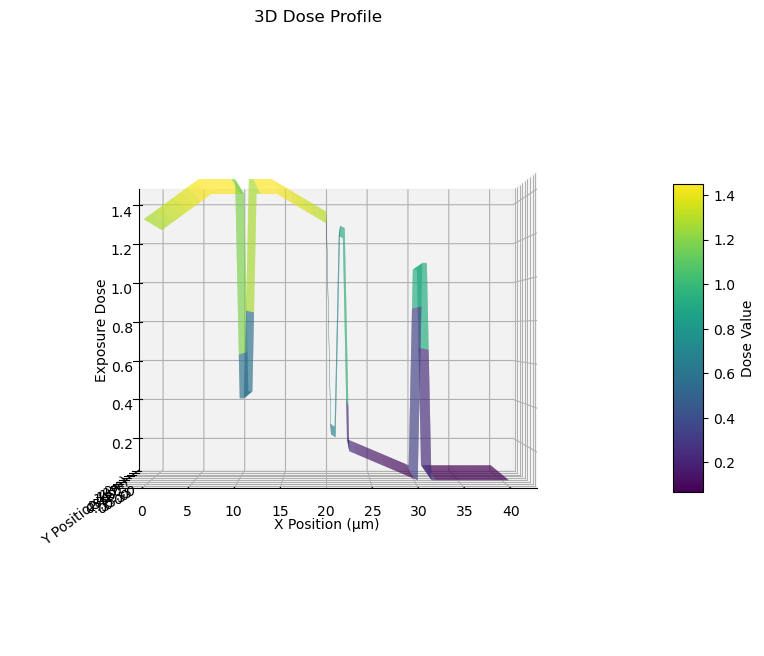

In [32]:
# Defining 2D uncorrected dose profile

min_pix_size = 25  # Address size
width = 40000  # Nanometers
depth = 20000  # Nanometers (example for 2D grid height)
pix_width = int(width / min_pix_size)
pix_depth = int(depth/ min_pix_size)

RT = 1  # Resist Threshold
D = np.zeros((pix_depth, pix_width))  # 2D dose array

# Initialize the first row dose profile (similar to your 1D logic)
D[0, 0] = 1.266
for i in range(pix_width):
    if i < 240:
        D[0, i + 1] = D[0, i] + 0.00076666
    if 239 < i < 400:
        D[0, i + 1] = D[0, i]
    if 399 < i < 420:
        D[0, i + 1] = D[0, i] - 0.05035
    if 419 < i < 440:
        D[0, i + 1] = D[0, i]
    if 439 < i < 460:
        D[0, i + 1] = D[0, i] + 0.05035
    if 459 < i < 560:
        D[0, i + 1] = D[0, i]
    if 559 < i < 800:
        D[0, i + 1] = D[0, i] - 0.000625
    if 799 < i < 820:
        D[0, i + 1] = D[0, i] - 0.0511
    if 819 < i < 840:
        D[0, i + 1] = D[0, i] - 0.00075
    if 839 < i < 860:
        D[0, i + 1] = D[0, i] + 0.04865
    if 859 < i < 880:
        D[0, i + 1] = D[0, i] - 0.00055
    if 879 < i < 900:
        D[0, i + 1] = D[0, i] - 0.05125
    if 899 < i < 1200:
        D[0, i + 1] = D[0, i] - 0.0004445
    if 1199 < i < 1220:
        D[0, i + 1] = D[0, i] + 0.04992
    if 1219 < i < 1240:
        D[0, i + 1] = D[0, i]
    if 1239 < i < 1260:
        D[0, i + 1] = D[0, i] - 0.04992
    if 1259 < i < 1599:
        D[0, i + 1] = D[0, 1260]

# Extend the dose profile along the second dimension
for j in range(1, pix_depth):
    D[j, :] = D[0, :]

# Generate a 2D grid for the x and y axes
x = np.linspace(0, width / 1000, pix_width)  # x-axis in micrometers
y = np.linspace(0, depth / 1000, pix_depth)  # y-axis in micrometers
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, D, cmap = 'viridis', edgecolor='none')

# Add labels and colorbar
ax.set_xlabel('X Position (μm)')
ax.set_ylabel('Y Position (μm)')
ax.set_zlabel('Exposure Dose')
ax.view_init(elev=0., azim=270)
ax.set_title('3D Dose Profile')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Dose Value')

# Show the plot
plt.show()


<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_5626/1668055292.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_5626/1668055292.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


NameError: name 'z' is not defined

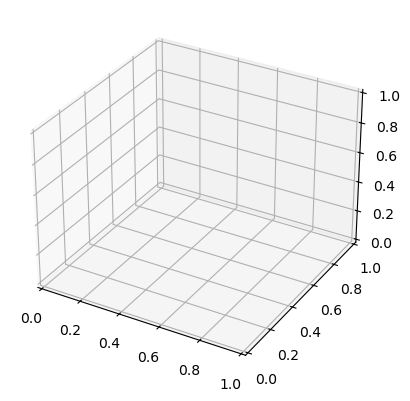

In [6]:
# Creating corrected dose profile 
import plotly.graph_objects as go

def PSF(eta, sigma_b, x, y):
    """Gaussian PSF with standard deviation sigma"""
    return (eta/sigma_b**2) * np.exp(-np.abs((x**2 + y**2))/(sigma_b**2))

eta = 0.5 #@50 keV on si
sigma_b = 6 #@50 keV on si

l = (width)/1000
pix_l = -pix_width/2
x = np.linspace(-l/2,l/2,pix_width)
y = np.linspace(-l/2,l/2,pix_width)
PB = PSF(eta, sigma_b, x, y)

plt.subplot(projection = '3d')
plt.plot(x,y,z)
plt.show()
plt.figure()

#r = np.linspace(0,l,pix_width) #Radius
pixels_r = np.linspace(-pix_l,pix_l-1,pix_width)


#PB = PSF(0.5,6,r) #Point spread function
#plt.plot(r,PB)
#plt.xlabel('Position $(\mu$m)')
#plt.ylabel('Point Spread function (PSF)')
#plt.figure()




con = np.convolve(D,PB,'same')/ (np.sum(D)*np.sum(PB))
plt.plot(micro_meter,con)
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Convolution of PSF and Dose profile')
plt.figure()


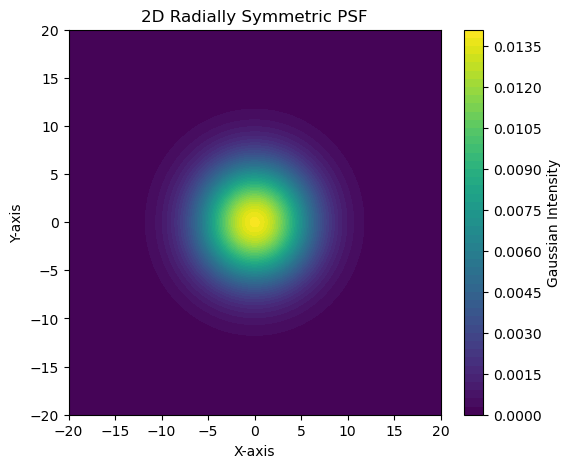

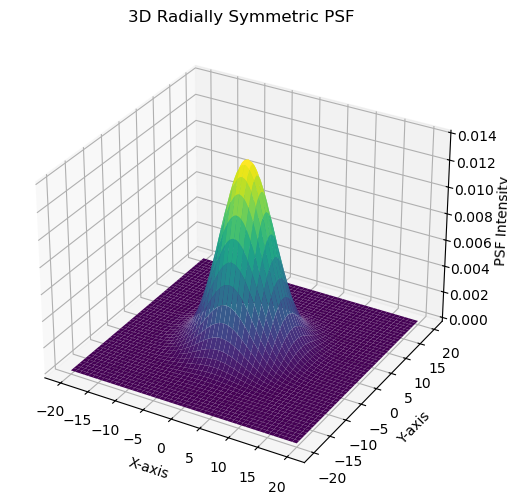

In [36]:
# Parameters for the Gaussian
mean = 0   # Center (x, y) at origin
eta = 0.5  #@50 keV on si
sigma_b = 6 #@50 keV on si        


grid_size = pix_width # Number of points along each axis
extent = 3      # Range in units of standard deviation

# Create a grid of (x, y) coordinates
#x = np.linspace(-extent*sigma_b, extent*sigma_b, grid_size)
#y = np.linspace(-extent*sigma_b, extent*sigma_b, grid_size)
x = np.linspace(-20, 20, grid_size)
y = np.linspace(-20, 20, grid_size)
x, y = np.meshgrid(x, y)

# Calculate the radial distance from the center
r = np.sqrt(x**2 + y**2)

# Define the 2D radially symmetric Gaussian
PB = (eta/sigma_b**2) * np.exp(-np.abs((x**2 + y**2))/(sigma_b**2))

# Plot the 2D Gaussian
plt.figure(figsize=(6, 5))
plt.contourf(x, y, PB, levels=50, cmap='viridis')
plt.colorbar(label='Gaussian Intensity')
plt.title('2D Radially Symmetric PSF')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Plot the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, PB, cmap='viridis', edgecolor='none')

# Customize the plot
ax.set_title('3D Radially Symmetric PSF')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('PSF Intensity')
plt.show()

In [ ]:
con_corr = convolve2d(D, PB, mode='same', boundary='wrap')

In [ ]:
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt

D_corr = D.copy()
for j in range(5):
    con_corr = convolve2d(D, PB, mode='same', boundary='wrap')/(np.sum(PB)*np.sum(D))
    D_corr = 2 * (1-con_corr)
    print(j)


# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, D_corr, cmap = 'viridis', edgecolor='none')

# Add labels and colorbar
ax.set_xlabel('X Position (μm)')
ax.set_ylabel('Y Position (μm)')
ax.set_zlabel('Exposure Dose')
ax.view_init(elev=0., azim=270)
ax.set_title('3D Dose Profile')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Dose Value')

# Show the plot
plt.show()

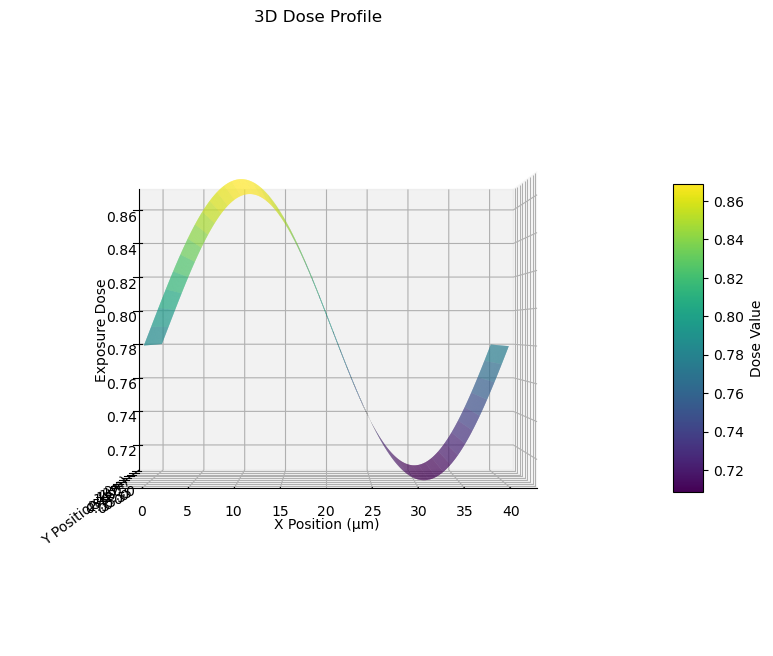

In [48]:
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# FFT-based convolution
PB_fft = fft2(PB, s=D.shape)
D_corr = D.copy() #Copies the dose profile 

for j in range(10):
    D_corr_fft = fft2(D_corr) 
    con_corr_fft = fftshift(ifft2(D_corr_fft * PB_fft).real)
    convolved_normalized = con_corr_fft / PB.sum()
    D_corr = 2 * (1-convolved_normalized)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, D_corr, cmap = 'viridis', edgecolor='none')

# Add labels and colorbar
ax.set_xlabel('X Position (μm)')
ax.set_ylabel('Y Position (μm)')
ax.set_zlabel('Exposure Dose')
ax.view_init(elev=0., azim=270)
ax.set_title('3D Dose Profile')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Dose Value')

# Show the plot
plt.show()